# Estudio de funcionamiento de EDVR, herramienta de superresolución de vídeos
## TFG del Grado en Ingeniería Informática en la Universidad de Burgos. Curso 2020-21

Realizado por:
*  Gonzalo Murillo Montes 

Tutores:
*  Pedro Latorre Carmona
*  César Ignacio Garcıa Osorio

@misc{wang2020basicsr,
  author =       {Xintao Wang and Ke Yu and Kelvin C.K. Chan and
                  Chao Dong and Chen Change Loy},
  title =        {BasicSR},
  howpublished = {\url{https://github.com/xinntao/BasicSR}},
  year =         {2020}
}


###  ¿NTIRE19 Challenge?

New Trends in Image Restoration and Enhancement workshop and challenges on image and video restoration and enhancement.
Proponen diversos retos en las áreas de la restauración de imágenes y vídeos y los participntes compiten para obtener los mejores resultados.

EDVR es la solución ganadora del NTIRE19 Challenge en la categoría de super-resolucion de vídeos, centrada en dos aspectos:

* Alienación de múltiples frames con mucho movimiento.
* Fusion de frames con distintos movimientos y partes borrosas. 

EDVR ganó en las 4 pruebas relacionadas con vídeos con amplio margen. 

###  ¿Qué es EDVR?

EDVR es el acrónimo de Enhanced Deformable convolutions Video Restoration, es una herramienta conteniada en BasicSR, centrada en la super-resolución y desemborronamiento de vídeos.

Está basada en dos principios el PCD (Pyramid,
Cascading and Deformable convolutions) y el TSA (Temporal and Spatial Attention)

* PCD: usa convoluciones deformables para agrupar píxeles cercanos, usando una estructura piramidal invertida empezando a pequeña escala y progresivamente aumentando, junto a esto se aplica un efecto cascada para mejorar resultados. 
* TSA: es um módulo de fusion que agrega información comparando frames con sus anteriores y posteriores, toda esa información luego se usa en todos los frames.


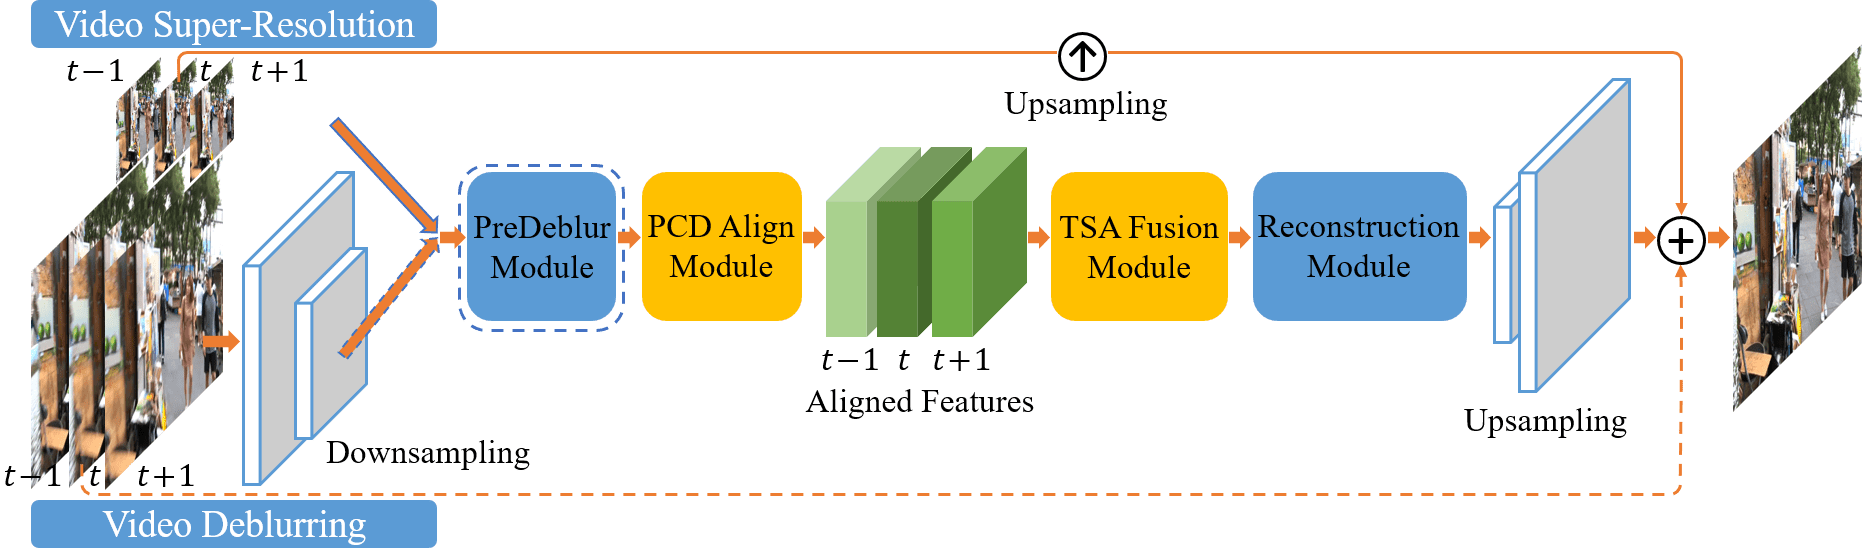

# Esta parte coreesponde con la demostración y análisis de cómo funciona EDVR


Lo primero es seleccionar los datasets o imágenes con las que se va a trabajar, si se quisiese usar un vídeo primero habría que generar la secuencia de frames y las imágenes en baja calidad.

Una vez hecho esto hay que crear un fichero .yml con las especificaciones.

In [10]:
!cat options/test/EDVR/configuracion.txt

name: EDVR_L_x4_REDS_SRblur_official
model_type: EDVRModel
scale: 4
num_gpu: 4 
manual_seed: 0

# name:os cambiar el nombre que le queremos dar a la ejecución
# model:el modelo siempre será el mismo ya que solo trabajamos con EDVR en BasicSR.
# scale: es la escala de la salida respecto a la entrada, el upsampling ratio.
# num_gpu: en todas nuestras ejecuciones el número de Gpu's es una por nustras limitaciones hardware, que se indica por 
#          parametro.

datasets:
  test:
    name: REDS4
    type: VideoTestDataset
    dataroot_gt: datasets/REDS/train_sharp/train/train_sharp
    dataroot_lq: datasets/REDS/train_blur_bicubic/train/train_blur_bicubic/X4
    meta_info_file: basicsr/data/meta_info/meta_info_REDS4_test_GT.txt
    io_backend:
      type: disk

    cache_data: false
    num_frame: 5
    padding: replicate

# name: el nombre del dataset.
# type: es el tipo de dataset que se usa, depende de la estructura de los dataset, en nuestros casos se usan dos:
#     video_test_data